# Employee Rentention Analysis
### Goal:
1. The aim is to model the probability of attrition of each employee from the HR Analytics Dataset. Studying the patterns will allow the higher management to identify the contributing factors that urge the employees to leave the company and which changes should be made to avoid their departure.
2. Also, to find which employees are likely to leave
---

> The Human Resources dataset contains: <br>

- <b>satisfaction_level:</b>Employee satisfaction level, from 0 to 1 [ numerical, decimal values between 0 and 1] <br>
- <b>last_evaluation:</b> Employee last evaluation score, from 0 to 1 [numerical, decimal values between 0 and 1]<br>
- <b>number_project:</b> Indicating the number of projects handled by the employee [numerical, integer values between 2 and 7]<br>
- <b>average_montly_hours:</b> The Average monthly hours worked by the employee [numerical, integer values between 96 and 310]<br>
- <b>time_spend_company:</b> Number of years spent in the company by the employee [numerical, integer values between 2 and 10]<br>
- <b>Work_acident:</b>Flag indicating if the employee had a work accident [categorical, boolean 0 or 1]<br>
- <b>promotion_last_5years:</b>Flag indicating if the employee has been promoting within the past 5 years [categorical, boolean]<br>
- <b>department: </b> Department of the employee: Sales, Accounting, HR, Technical, Support, Management, IT, Product Management, Marketing, R&D [categorical, 10 values]<br>
- <b>salary:</b> Salary level of the employee: Low, Medium, High [categorical, 3 values]<br>
- <b>left:</b> Flag indicating if the employee has left the company [categorical, boolean]  <br>
This is the target variable of the study, the one to be modelled.



Loading set of of libraries required of the project.

In [19]:
     
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting
sns.set(style='white')

from sklearn import preprocessing #Preprocessing

from scipy.stats import skew, boxcox_normmax #Preprocessing
from scipy.special import boxcox1p #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation
from sklearn.feature_selection import RFE, RFECV #Feature Selection

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   # We can see the value of multiple statements at once.

In [20]:

hr_df = pd.read_csv('hr.csv') 

hr_df.head()
hr_df.tail()
hr_df.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
print('Rows:', hr_df.shape[0], '| Columns:', hr_df.shape[1])

Rows: 14999 | Columns: 10


The dataset consists in 14,999 rows and 10 columns. Each row represents an employee, and each column contains one employee attribute

Checking for any missing values

In [26]:
hr_df[hr_df.isnull().any(axis=1)]      # display axis = 1, displays rows with missing data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


The dataset does not contain any missing or null values. <br>
Let's view the values of the categorical variables - sales and salary

In [30]:
print('Sales:',hr_df['sales'].unique())
print('Salary:',hr_df['salary'].unique())

Sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary: ['low' 'medium' 'high']


The variable sales seems to represent the company departments. Thus, it will be renamed as department.

In [34]:
# Rename variable sales
hr_df = hr_df.rename(index=str, columns={'sales':'department'})
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<b>Exploratory Data Analysis:

 The objective of this study is to build a model to predict the value of the variable <b>left</b>, based on the other metrics available. <br>
  Need to predict based on the data here , as HR uses historical data to run it on the exisitng data to find employees who are likeyl to leave. <br>
Following up with  incentives to the indentified employees, if they want to retain these selected employees.

In [38]:
hr_df.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [39]:
hr_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [40]:
hr_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

<b> 23.8% of the employees listed in the dataset have left the company.

In [41]:
hr_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left the company have:
<ol>
1. lower satisfaction level: 0.44 <br>
2. More monthly working hours: 207 <br>
3. lower work accident ratio: 0.05 <br>
4. lower promotion rate: 0.01 <br>
</ol>

### Displaying Correlation Matrix:

No handles with labels found to put in legend.


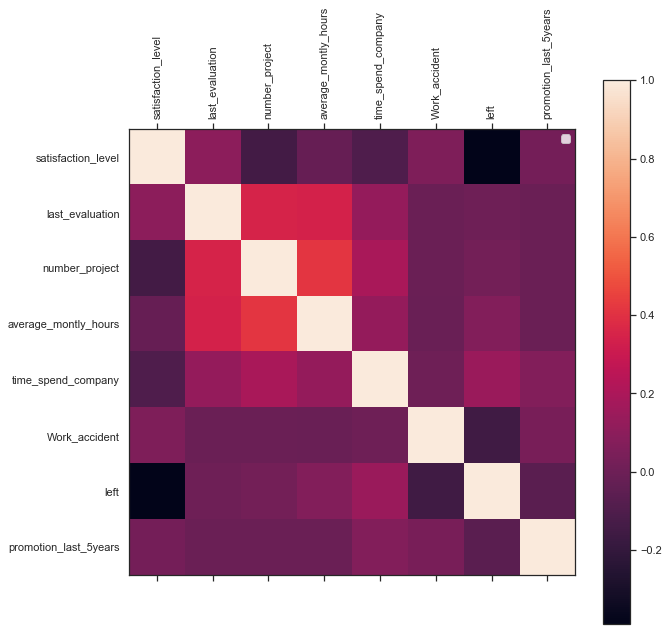

In [44]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(hr_df)

<b>Correlation Analysis</b> <br>
The correlation matrix will help, identify relationships between the different variables present in the dataset. It might also reveal some patterns.

- Most higly correlated to left is the time spent in the company. Longer they have worked, higher are their chances of leaving
- The number of projects and average_monthly_hours have a moderate positive correlation
- last_evaluation and average_monthly_hours have a moderate positive correlation 
- left and satisfaction_level have a moderate negative correlation  